# Naive-Bayes

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org

![estrella_muerte](https://drive.google.com/uc?export=view&id=1imHTw9EGpeGHURYLXsQ7QJPiKQhyXKyY)


## **1. Introducción a Naive-Bayes**

En este tema vamos a centrarnos en una serie de algoritmos de clasificación basados en el Teorema de Bayes (Probabilidad).

En problemas de clasificación estamos interesados seleccionar la mejor clase (Y) dados unos nuevos datos (X) que le damos al modelo para su predicción. Esta forma de verlo nos lleva al Teorema de Bayes:

$$P(Y/X) = \frac{P(X/Y)*P(Y)}{P(X)}$$

donde:

$P(Y/X)$ es la probabilidad de que se cumpla nuestra hipótesis sobre Y dados X. Por ejemplo: en un problema de clasificación con dos clases (0, 1), si partimos de la hipótesis de que Y=1, P(Y=1/X) será la probabilidad de que sea 1 dados nuestros valores de X.

$P(X/Y)$ es la probabilidad de que se cumplan X suponiendo que Y es cierto; en nuestro ejemplo, P(X/Y=1) sería "suponiendo que Y=1".

$P(Y)$ es la probabilidad de que se cumpla Y sin tener en cuenta los datos de X

$P(X)$ es la probabilidad de los datos sin tener en cuenta Y

**Ejemplo**

Vamos a ver su cálculo con un ejemplo sencillo. Supongamos un problema de clasificación donde queremos si dadas ciertas palabras un email es spam/no-spam (S/NS)

Tenemos una serie de palabras en nuestro dataset de entrenamiento y hemos contado cuántas veces se repiten sabiendo si son S o NS:

Número de emails S en nuestro dataset de entrenamiento: 5
Número de emails NS en nuestro dataset de entrenamiento: 20

En la tabla siguiente se muestran los conteos hechos de ciertas palabras en los emails de entrenamiento:


Vamos a ver la probabilidad de que sea S/NS un email que contiene con las palabras: *oferta* y *abrazo*


![tabla_spam](https://drive.google.com/uc?export=view&id=14FGGWgCQtdoFmeS4eyPsiD-v9j6J07oa)

Para la hipótesis de que sea spam (S):

$P(X/Y) = P(oferta/S) * P(abrazo/S) = \frac{3}{12}*\frac{1}{12}=0.021$

$P(Y=S) = \frac{12}{12+21} = 0.36$

$P(X) = P(oferta)*P(abrazo) = \frac{4}{33} * \frac{9}{33} = 0.033$

Para la hipótesis de que sea no-spam (NS):

$P(X/Y) = P(oferta/NS) * P(abrazo/NS) = \frac{1}{21}*\frac{8}{21}=0.018$

$P(Y=NS) = \frac{21}{12+21} = 0.64$

$P(X) = P(oferta)*P(abrazo) = \frac{4}{33} * \frac{9}{33} = 0.033$

Ya tenemos todos los valores necesarios para calcular lo que venimos buscando:

$P(Y/X) = P(S/(oferta-abrazo)) = \frac{0.021*0.36}{0.033}=0.23$

$P(Y/X) = P(NS/(oferta-abrazo)) = \frac{0.018*0.64}{0.033}=0.35$

Por tanto, en este ejemplo, el Teorema de Bayes nos dice que es más probable que no sea spam un email que contiene las palabras *oferta* y *abrazo*








## **2. Tipos de Algoritmos**

Vamos a ver tres tipos de algoritmos:
* **GaussianNB**: donde los valores de las variables predictoras son números reales (edad, precio, etc...).
* **BernulliNB**: donde los valores de las variables predictoras son binarias (0, 1)
* **MultinomialNB**: donde los valores de las variables predictoras son conteos del número de veces que aparece una variable en concreto.

BernuilliNB y MultinomialNB tienen aplicación en problemas de clasificación de textos. En este tema nos centraremos en los de MultinomialNB.


### **2.1. GaussianNB**









#### **2.1.1. Funcionamiento**

Estos algoritmos se puede aplicar a cualquier tipo de dataset de clasificación. Lo que hace es suponer de partida que todos los datos de cada una de las variables predictoras cumplen con una campana de Gauss.

![campanas_gauss](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

Fuente: https://en.wikipedia.org/wiki/Normal_distribution

Cada una de las funciones de densidad (azul, rojo, verde o naranja) podrían ser las diferentes variables predictoras de nuestro dataset. De hecho, no siempre es así, pero este tipo de algoritmo asume esta distribución para poder aplicarse.

Antes hemos visto cómo calculábamos probabilidades con simples fracciones de recuentos. En este caso, las probabilidad se calcula a través de la media y la desviación típica que nos modelan la campana de Gauss de cada columna de X.

A partir de ahí se calculan las probabilidades mediante el cálculo de áreas a la derecha o izquierda. 

La programación en Python con Scikit-Learn sería la siguiente.





















#### **2.1.2. Programación en Python**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

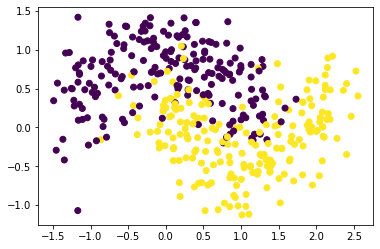

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400, noise=0.3, random_state=42)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

(320, 2) (320,)
(80, 2) (80,)


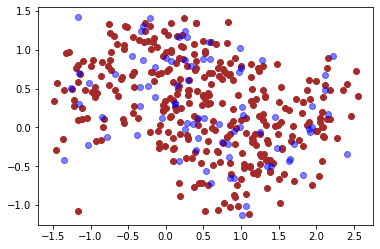

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

plt.scatter(x=X_train[:,0], y=X_train[:,1], c="brown")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c="blue", alpha=0.5)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
pred_train = gnb_model.predict(X_train)
pred_test = gnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 80.00
Precisión sobre los datos de test: 95.00


In [ ]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black'
                )

    plt.suptitle("Áreas definidas por el Árbol de Decisión")
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

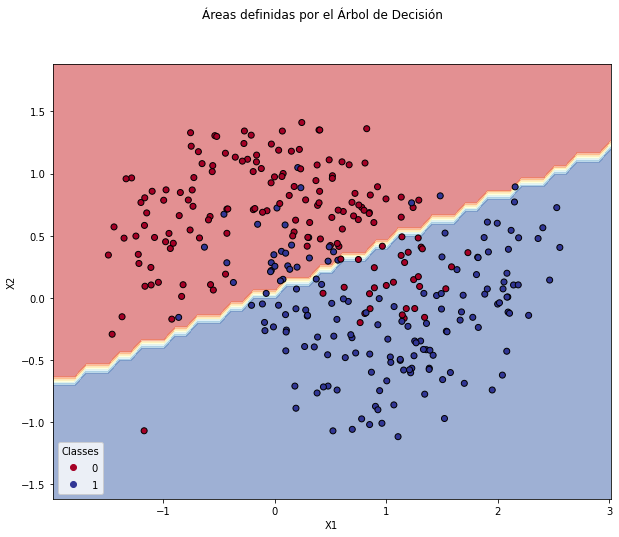

In [ ]:
plt.figure(figsize=(10,8))
plot_boundaries_test(X_train, y_train, gnb_model, False, X_train, y_train)

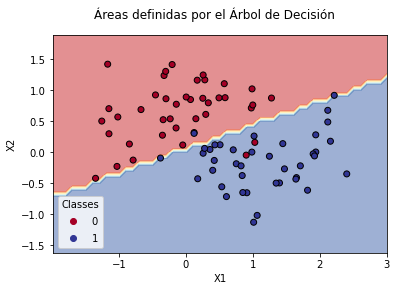

In [ ]:
plot_boundaries_test(X_train, y_train, gnb_model, False, X_test, y_test)

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, pred_test)

array([[38,  2],
       [ 2, 38]])

Confusion matrix:



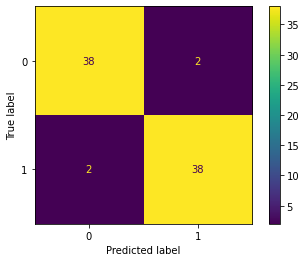

In [ ]:
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(gnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

### **2.2. BernoulliNB**

#### **2.2.1. Funcionamiento**

Vamos a ver su funcionamiento utilizando en ejemplo anterior de spam/no-spam

![tabla_binomial](https://drive.google.com/uc?export=view&id=11Ns4z2GmlGPTl4e-r2xsxCpzPI1zUna5)

Como se puede ver, esta tabla contiene valores binarios.

Vamos a ver cómo aplicar el algoritmo de BernoulliNB en Python.

#### **2.2.2. Programación en Python**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dic_df = {
'oferta':[0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
'llama':[1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
'abrazo':[0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0],
'especial':[0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
'hola':[1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
'class':['S','S','S','S','S','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS']}

df = pd.DataFrame(dic_df)
df

,oferta,llama,abrazo,especial,hola,class
0,0,1,0,0,1,S
1,1,0,1,0,1,S
2,0,1,0,1,0,S
3,1,1,0,0,0,S
4,1,1,0,1,0,S
5,0,0,0,0,1,NS
6,0,0,0,0,1,NS
7,0,0,0,0,1,NS
8,0,0,1,0,1,NS
9,0,0,1,0,1,NS


In [ ]:
df["class"] = df["class"].map({"S":1, "NS":0})

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(20, 5) (20,)
(5, 5) (5,)


In [ ]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB(alpha=1.0) ## probar con 5 o 10
bnb_model.fit(X_train, y_train)
pred_train = bnb_model.predict(X_train)
pred_test = bnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*bnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*bnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 90.00
Precisión sobre los datos de test: 60.00


El parámetro "alpha" controla la complejidad del modelo. Cuanto mayor es "alpha" el modelo es más suave y un modelo menos complejo y, por tanto, menos propenso al overfitting.

Confusion matrix:



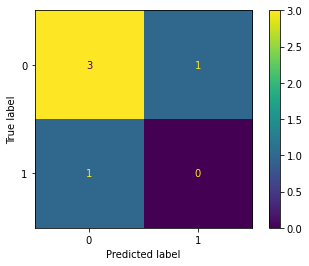

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(bnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

Vamos a predecir para una un email nuevo con las palabras "oferta" y "abrazo":



In [ ]:
bnb_model = BernoulliNB(alpha=5.0)
bnb_model.fit(X, y)
pred_train = bnb_model.predict(np.array([1,0,1,0,0]).reshape(1,-1))
pred_train

array([0])

### **2.3. MultinomialNB**




#### **2.3.1. Funcionamiento**

Como hemos comentado anteriormente el algoritmo MuntinomialNB funciona correctamente cuando los valores de las variables son recuentos. En el ejemplo anterior de BernoulliNB hemos realizado un recuento también, pero he tenido el cuidado de no repetir ninguna palabra en los emails. De ahí que los datos sean binarios.

Palabras como "abrazo" u "hola" es muy posible que sólo aparezcan una sola vez por email. Sin embargo, otras como "oferta", "llama" o "especial" sí podrían repetirse en un mismo email.

Vamos a verlo con un ejemplo ligeramente diferente a lo visto anteriormente:

![campanas_gauss](https://drive.google.com/uc?export=view&id=1s-_cOfMKiFR3nJjHDzwcdTCg6untQ40Y)

He añadido la palabra "ahora" que se repite más veces por cada email y también he repetido más veces el resto.


#### **2.3.2. Programación en Python**

In [ ]:
dic_df = {
          'oferta':[0,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          'llama':[1,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
          'abrazo':[0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0],
          'especial':[0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          'ahora':[1,0,1,0,2,1,0,0,0,0,3,0,0,0,0,2,1,0,0,0,0,2,3,0,0],
          'hola':[1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
          'class':['S','S','S','S','S','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS']
}

df = pd.DataFrame(dic_df)
df.head()

,oferta,llama,abrazo,especial,ahora,hola,class
0,0,1,0,0,1,1,S
1,2,0,1,0,0,1,S
2,0,2,0,1,1,0,S
3,1,1,0,0,0,0,S
4,3,1,0,2,2,0,S


In [ ]:
df["class"] = df["class"].map({"S":1, "NS":0})

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(20, 6) (20,)
(5, 6) (5,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=10.0) ## probar con 5 o 10
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 85.00
Precisión sobre los datos de test: 80.00


Confusion matrix:



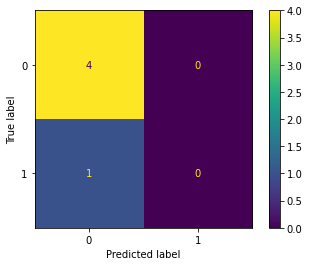

In [ ]:
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(mnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

Vamos a aumentar el número de emails para ver cómo se comporta.

In [ ]:
dic_df = {
          'oferta':[0,2,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          'llama':[1,0,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0],
          'abrazo':[0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0],
          'especial':[0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
          'ahora':[1,0,1,0,2,1,0,0,0,0,3,0,0,0,0,2,1,0,0,0,0,2,3,0,0,1,0,1,0,2,1,0,0,1,0,2,0,0,0,0,3,1,0,0,0,0,2,2,0,0],
          'hola':[1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0],
          'class':['S','S','S','S','S','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS',
                   'S','S','S','S','S','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS','NS']
}

df = pd.DataFrame(dic_df)
df.head()

,oferta,llama,abrazo,especial,ahora,hola,class
0,0,1,0,0,1,1,S
1,2,0,1,0,0,1,S
2,0,2,0,1,1,0,S
3,1,1,0,0,0,0,S
4,3,1,0,2,2,0,S


In [ ]:
df["class"] = df["class"].map({"S":1, "NS":0})

(40, 6) (40,)
(10, 6) (10,)
Precisión sobre los datos de entrenamiento: 85.00
Precisión sobre los datos de test: 90.00
Confusion matrix:



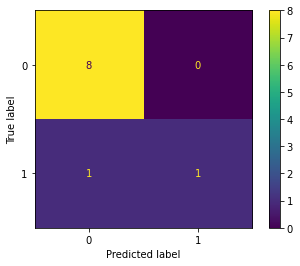

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=1.0) ## probar con 5 o 10
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(mnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

**LEAVE ONE OUT - CROSS VALIDATION**

Para los casos en los que disponemos de pocas muestras (en este caso emails) la separación entre test y train del 80-20% no suele ser del todo eficiente.

LOO-CV es una técnica en la que se lleva a cabo el ajuste (fit) del modelo tantas veces como muestras tenemos. En cada pase, seleccionamos una muestra como test y todo el resto como train. Se podría decir que es la forma más justa de evaluar un modelo pero no siempre es posible porque consume muchos recursos en casos de muchas muestras (que es lo normal).

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

mnb_model = MultinomialNB(alpha=1.0) ## probar con 5 o 10

X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

y_true = []  
y_pred = []

loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  mnb_model.fit(X_train, y_train)
  pred_test = mnb_model.predict(X_test)

  y_true.append(y_test[0])
  y_pred.append(pred_test[0])
      
print("Precisión sobre los datos de test: {:.2f}".format(100.0*accuracy_score(y_true, y_pred)))
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_true, y_pred)



Precisión sobre los datos de test: 84.00


array([[36,  4],
       [ 4,  6]])

**¿Cuál es el gran problema que tienen estos algoritmos aplicados a texto?**

No tiene en cuenta el orden de las palabras o el lugar en el que se encuentre dentro del texto. Sólo tenemos en cuenta la cantidad de veces que aparecen las palabras. 

Aunque es muchas circuntancias (problemas complejos) va a ser necesario acudir al Deep Learning, donde tenemos algoritmos que sí tienen en cuenta el orden y semántica de las palabras, en otras ocasiones es suficiente con aplicar estos modelos mucho más sencillos.


## **3. Naive Bayes en Clasificación de textos**



### **3.1. Bag Of Words**

Cuando tenemos un texto o un conjunto de ellos la forma más sencilla de gestionarlos para que sean "entendidos" por un algoritmo es mediante el modelo "Bag of Words". 

De hecho, no es otra cosa que lo que hemos estado viendo hasta ahora. Es decir, imaginemos que disponemos del siguiente texto:

"*Mercadona retira de sus estantes una de sus pizzas más vendidas. Se trata de la pizza Margarita de Hacendado, la marca blanca del supermercado. Mercadona sí la tendrá en una nueva gama en colaboración con Casa Tarradellas*"

Lo que habría que hacer es situar cada una de las palabras que aparecen como columnas del dataset. Los valores serían el número de veces que aparecen en el texto. "Mercadona" tendría valor 2.

Se compondría una tabla parecida a la del ejemplo MultinomialNB pero con estas palabras.



### **3.2. Vectorización**

Es proceso que se utiliza para convertir un "corpus" de texto en una serie de vectores donde sus valores son la frecuencia de aparición en el texto. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus_string = """Mercadona retira de sus estantes una de sus pizzas más vendidas. 
Se trata de la pizza Margarita de Hacendado, la marca blanca del supermercado. 
Mercadona sí la tendrá en una nueva gama en colaboración con Casa Tarradellas"""


In [ ]:
corpus = list(corpus_string.split("\n"))
corpus

['Mercadona retira de sus estantes una de sus pizzas más vendidas. ',
 'Se trata de la pizza Margarita de Hacendado, la marca blanca del supermercado. ',
 'Mercadona sí la tendrá en una nueva gama en colaboración con Casa Tarradellas']

In [ ]:
vectorizer = CountVectorizer()
vect = vectorizer.fit_transform(corpus)
vect

<3x28 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [ ]:
vect.todense()

matrix([[0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
         2, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
         0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 1, 1, 1, 0, 1, 0]])

In [ ]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))

In [ ]:
pd.DataFrame(vect.todense(), columns = vocab)

,blanca,casa,colaboración,con,de,del,en,estantes,gama,hacendado,la,marca,margarita,mercadona,más,nueva,pizza,pizzas,retira,se,supermercado,sus,sí,tarradellas,tendrá,trata,una,vendidas
0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,0,0,0,1,1
1,1,0,0,0,2,1,0,0,0,1,2,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
2,0,1,1,1,0,0,2,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0


Se puede comprobar fácilmente que están todas las palabras con sus recuentos. Es importante notar que sklearn está tratando el corpus de tres frases como tres textos diferentes. Si no se hubiera hecho el "split" tendríamos una sola fila.

**Filtrado de Stop-Words**

Vamos a eliminar de nuestro texto las palabras que no suelen ofrecer un valor añadido en su significado. Palabras como: con, de, del, ...
se filtrarán.



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
len(stopwords.words('spanish'))

313

In [ ]:
vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))
vect = vectorizer.fit_transform(corpus)
vect

<3x17 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [ ]:
vect.todense()

matrix([[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
pd.DataFrame(vect.todense(), columns = vocab)

,blanca,casa,colaboración,estantes,gama,hacendado,marca,margarita,mercadona,nueva,pizza,pizzas,retira,supermercado,tarradellas,trata,vendidas
0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0
2,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0


Además de Stop-Words, existen dos tipos de filtrados que no vamos a ver pero es conveniente que sepáis que existen.

*Stemming y Lematization:* 

Sirven para reducir la dimensionalidad del dataset gracias a juntar palabras que son derivadas unas de otras. Un ejemplo muy claro son los verbos: jugando, jugado, jugar, etc..., todas tienen un mismo lexema.

Si aparecieran las palabras anteriores en un texto, se sumarían sus conteos individuales en una sola palabra: "jugar".


### **3.3. TF-IDF**

Una forma diferente de filtrar palabras que no aportan nada a nuestros modelos de clasificación es utilizando TF-IDF (Term Frequency - Inverse Documnet Frequency).

Si existe una palabra que aparece mucho en uno de los textos pero no tanto en el resto de textos, podríamos decir que es importante para describir su contenido.

Vamos a intentar clasificar una serie de textos por las palabras utilizadas:


* "Acuerdo final en la UE sobre el pasaporte Covid para que entre en vigor el 1 de julio.Eurocámara y Consejo pactan la composición final del certificado digital Covid, que recogerá las vacunas administradas y las PCR efectuadas"

*  "Mercadona retira de sus estantes una de sus pizzas más vendidas. Se trata de la pizza Margarita de Hacendado, la marca blanca del supermercado. Mercadona sí la tendrá en una nueva gama en colaboración con Casa Tarradellas"

Las palabras "Covid" y "Mercadona" aparecen dos veces en sus respectivos textos pero ninguna en el otro. Son palabras que van a recibir un mayor peso como entrada al algoritmo de clasificación.




In [ ]:
corpus = ["Acuerdo final en la UE sobre el pasaporte Covid para que entre en vigor el 1 de julio.Eurocámara y Consejo pactan la composición final del certificado digital Covid, que recogerá las vacunas administradas y las PCR efectuadas",
"Mercadona retira de sus estantes una de sus pizzas más vendidas. Se trata de la pizza Margarita de Hacendado, la marca blanca del supermercado. Mercadona sí la tendrá en una nueva gama en colaboración con Casa Tarradellas"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
tfidf.todense()

matrix([[0.15064882, 0.15064882, 0.        , 0.        , 0.15064882,
         0.        , 0.15064882, 0.        , 0.15064882, 0.30129764,
         0.10718788, 0.10718788, 0.15064882, 0.15064882, 0.30129764,
         0.21437575, 0.15064882, 0.        , 0.15064882, 0.30129764,
         0.        , 0.        , 0.15064882, 0.21437575, 0.30129764,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.15064882, 0.15064882, 0.15064882, 0.15064882, 0.        ,
         0.        , 0.30129764, 0.15064882, 0.        , 0.        ,
         0.15064882, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.15064882, 0.        , 0.15064882,
         0.        , 0.15064882],
        [0.        , 0.        , 0.14405675, 0.14405675, 0.        ,
         0.14405675, 0.        , 0.14405675, 0.        , 0.        ,
         0.40999026, 0.10249757, 0.        , 0.        , 0.        ,
         0.20499513, 0.        , 0.14405675, 0.        , 0.        ,


In [ ]:
np.sort(list(vectorizer.vocabulary_.keys()))

array(['acuerdo', 'administradas', 'blanca', 'casa', 'certificado',
       'colaboración', 'composición', 'con', 'consejo', 'covid', 'de',
       'del', 'digital', 'efectuadas', 'el', 'en', 'entre', 'estantes',
       'eurocámara', 'final', 'gama', 'hacendado', 'julio', 'la', 'las',
       'marca', 'margarita', 'mercadona', 'más', 'nueva', 'pactan',
       'para', 'pasaporte', 'pcr', 'pizza', 'pizzas', 'que', 'recogerá',
       'retira', 'se', 'sobre', 'supermercado', 'sus', 'sí',
       'tarradellas', 'tendrá', 'trata', 'ue', 'una', 'vacunas',
       'vendidas', 'vigor'], dtype='<U13')

In [ ]:
df_ti = pd.DataFrame(tfidf.todense(), columns=np.sort(list(vectorizer.vocabulary_.keys())))

In [ ]:
df_ti

,acuerdo,administradas,blanca,casa,certificado,colaboración,composición,con,consejo,covid,de,del,digital,efectuadas,el,en,entre,estantes,eurocámara,final,gama,hacendado,julio,la,las,marca,margarita,mercadona,más,nueva,pactan,para,pasaporte,pcr,pizza,pizzas,que,recogerá,retira,se,sobre,supermercado,sus,sí,tarradellas,tendrá,trata,ue,una,vacunas,vendidas,vigor
0,0.150649,0.150649,0.000000,0.000000,0.150649,0.000000,0.150649,0.000000,0.150649,0.301298,0.107188,0.107188,0.150649,0.150649,0.301298,0.214376,0.150649,0.000000,0.150649,0.301298,0.000000,0.000000,0.150649,0.214376,0.301298,0.000000,0.000000,0.000000,0.000000,0.000000,0.150649,0.150649,0.150649,0.150649,0.000000,0.000000,0.301298,0.150649,0.000000,0.000000,0.150649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150649,0.000000,0.150649,0.000000,0.150649
1,0.000000,0.000000,0.144057,0.144057,0.000000,0.144057,0.000000,0.144057,0.000000,0.000000,0.409990,0.102498,0.000000,0.000000,0.000000,0.204995,0.000000,0.144057,0.000000,0.000000,0.144057,0.144057,0.000000,0.307493,0.000000,0.144057,0.144057,0.288114,0.144057,0.144057,0.000000,0.000000,0.000000,0.000000,0.144057,0.144057,0.000000,0.000000,0.144057,0.144057,0.000000,0.144057,0.288114,0.144057,0.144057,0.144057,0.144057,0.000000,0.288114,0.000000,0.144057,0.000000


In [ ]:
df_ti["covid"]

0    0.301298
1    0.000000
Name: covid, dtype: float64

In [ ]:
df_ti["mercadona"]

0    0.000000
1    0.288114
Name: mercadona, dtype: float64

In [ ]:
df_ti["de"]

0    0.107188
1    0.409990
Name: de, dtype: float64

In [ ]:
df_ti.max(axis=1)

0    0.301298
1    0.409990
dtype: float64

Hemos encontrado un problema. La palabra "de" es la que tiene mayor peso dado por TF-IDF. 

¿Por qué?  

Aparece 3 veces en el segundo texto y 1 vez en el primero. 
Realmente, este problema no se muestra cuando trabajamos con muchos textos. En esta ocasión ha recibido bastante peso porque hemos hecho un ejemplo con un corpus muy pequeño y dos textos solamente. 

**CONCLUSIONES**

El uso de TF-IDF es muy útil siempre que se quiera realizar clasificación de textos. Si nos encontramos con un corpus pequeño será conveniente aplicar antes el filtrado por "stop-words" de manera que eliminemos el problema como hemos visto en el ejemplo.